In [1]:
# @title Install the required packages
!pip install pytesseract
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
# @title Import necessary libraries
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Configure tesseract executable path
# pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract

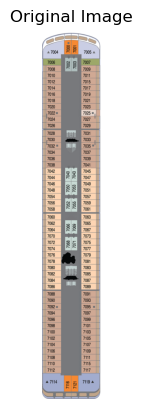

In [9]:
# @title Load and Display Original Image
# Path to your image file
image_path = './Ships/Azamara-3711.png'

# Read the image using OpenCV
image = cv2.imread(image_path)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()


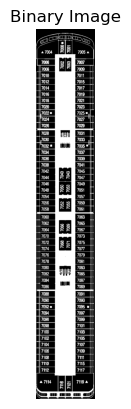

In [10]:
 # @title Preprocess the Image
 # Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding or other preprocessing techniques
_, binary_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY_INV)

# Display the preprocessed image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()


In [11]:
 # @title Extract Text Using Tesseract
 # Use pytesseract to do OCR on the image
custom_config = r'--oem 3 --psm 6 outputbase digits'
text = pytesseract.image_to_string(binary_image, config=custom_config)

# Print the extracted text
print("Extracted Text:", text)


Extracted Text: 427004 7005
706 07
7008-00011
704 17
7020 7003
70 70059

0
70 7009
788 71
7046 7049

7054 7057

756 7059
7062 7065

22

7064
7072 7075
077
7076 7079
076 781
7084
7059
7090
782 7085
7088 701
7103
04
7106 7109
7108
0 75



In [12]:
# @title  Get the Coordinates of Detected Numbers
# Get the coordinates of the detected numbers
boxes = pytesseract.image_to_boxes(binary_image, config=custom_config)

# Initialize a list to store detected four-digit numbers and their coordinates
four_digit_numbers = []

# Iterate over the boxes to extract coordinates and digits
for b in boxes.splitlines():
    b = b.split()
    x, y, w, h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
    digit = b[0]
    # Store the bounding box and digit
    four_digit_numbers.append((digit, x, y, w, h))

In [13]:
# @title Group Digits into Four-Digit Numbers and Calculate Coordinates
# Group digits into four-digit numbers
i = 0
while i <= len(four_digit_numbers) - 4:
    group = four_digit_numbers[i:i+4]
    # Check if we have a valid four-digit number
    if all(len(d[0]) == 1 and d[0].isdigit() for d in group):
        x1, y1 = group[0][1], group[0][2]
        x2, y2 = group[3][3], group[3][4]
        four_digit_number = ''.join(d[0] for d in group)
        # Draw the rectangle
        cv2.rectangle(image, (x1, image.shape[0] - y1), (x2, image.shape[0] - y2), (0, 255, 0), 2)
        # Calculate the center coordinates
        center_x = (x1 + x2) // 2
        center_y = image.shape[0] - (y1 + y2) // 2
        # Draw the center coordinates on the image
        coordinates_text = f"({center_x}, {center_y})"
        cv2.putText(image, coordinates_text, (x1, image.shape[0] - y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)
        print(f"Four-digit number '{four_digit_number}' found at coordinates (x1, y1, x2, y2): {x1}, {y1}, {x2}, {y2}")
        print(f"Center coordinates: {center_x}, {center_y}")
        i += 4  # Move to the next potential group
    else:
        i += 1  # Move to the next digit


Four-digit number '4270' found at coordinates (x1, y1, x2, y2): 22, 1469, 52, 1485
Center coordinates: 37, 95
Four-digit number '0470' found at coordinates (x1, y1, x2, y2): 37, 1467, 192, 1481
Center coordinates: 114, 98
Four-digit number '0570' found at coordinates (x1, y1, x2, y2): 185, 1467, 80, 1445
Center coordinates: 132, 116
Four-digit number '6077' found at coordinates (x1, y1, x2, y2): 44, 1409, 16, 1417
Center coordinates: 30, 159
Four-digit number '0001' found at coordinates (x1, y1, x2, y2): 162, 1391, 228, 1417
Center coordinates: 195, 168
Four-digit number '1704' found at coordinates (x1, y1, x2, y2): 229, 1391, 80, 1336
Center coordinates: 154, 209
Four-digit number '1770' found at coordinates (x1, y1, x2, y2): 166, 1310, 39, 1266
Center coordinates: 102, 284
Four-digit number '2070' found at coordinates (x1, y1, x2, y2): 38, 1220, 189, 1255
Center coordinates: 113, 335
Four-digit number '0370' found at coordinates (x1, y1, x2, y2): 173, 1234, 80, 1228
Center coordinate

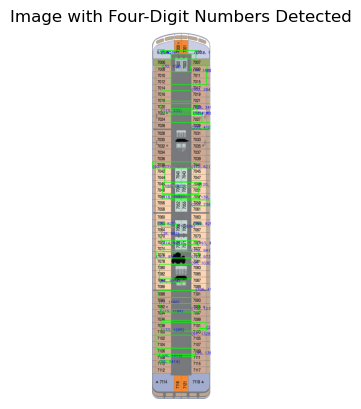

False

In [14]:
# @title Display the Image with Detected Numbers
# Display the image with rectangles and coordinates
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image with Four-Digit Numbers Detected')
plt.axis('off')
plt.show()

# Save the output image
output_image_path = './Ships/Output/Azamara-3711-output.png'
cv2.imwrite(output_image_path, image)
